# Developmental Economics Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
from sklearn.linear_model import LinearRegression

# Trade Data

In [2]:
dft = pd.read_csv('Data\CountryTradeFull.csv') #trade data

In [3]:
print(dft.info())
print(dft.head())
print(dft["country_english_name"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33848 entries, 0 to 33847
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   series_type                   33848 non-null  object 
 1   table_type                    33848 non-null  object 
 2   table_type_desc               33848 non-null  object 
 3   country_code                  33848 non-null  int64  
 4   country_type                  33848 non-null  object 
 5   country_english_name          33848 non-null  object 
 6   year                          33848 non-null  int64  
 7   period_type                   33848 non-null  object 
 8   period_number                 33848 non-null  int64  
 9   period                        33848 non-null  int64  
 10  period_in_date                33848 non-null  object 
 11  trade_flow                    33848 non-null  object 
 12  trade_flow_desc               33848 non-null  object 
 13  c

In [4]:
dft.dropna()

Empty DataFrame
Columns: [series_type, table_type, table_type_desc, country_code, country_type, country_english_name, year, period_type, period_number, period, period_in_date, trade_flow, trade_flow_desc, commodity_group_code, commodity_group_name, partner_country_code, partner_country_english_name, base_year, currency_type, value, value_unit, value_type, value_type_desc, estimation_type, estimation_type_desc]
Index: []

[0 rows x 25 columns]

In [4]:
dft.drop(columns=['series_type', 'table_type', 'table_type_desc', 'country_code', 'period_type', 'period', 'period_in_date', 
                  'commodity_group_code', 'commodity_group_name', 'partner_country_code', 'partner_country_english_name', 
                  'base_year', 'currency_type', 'value_unit', 'value_type', 'value_type_desc', 'estimation_type_desc', 
                  'period_number', 'estimation_type'], inplace=True)

In [5]:
dft

country_type                   country_english_name  year trade_flow  \
0                C                            Afghanistan  1946          X   
1                C                            Afghanistan  1946          M   
2                C                              Argentina  1946          M   
3                C                              Argentina  1946          X   
4                C                              Australia  1946          X   
...            ...                                    ...   ...        ...   
33843            G                     Former USSR - Asia  2022          M   
33844            G                     Former USSR-Europe  2022          M   
33845            G                     Former USSR-Europe  2022          X   
33846            G  Developed countries: Asia and Pacific  2022          M   
33847            G  Developed countries: Asia and Pacific  2022          X   

      trade_flow_desc         value  
0             Exports  4.782000e+01  
1             Imports  5.000000e+01  
2             Imports  5.880000e+02  
3             Exports  1.168000e+03  
4             Exports  6.373636e+02  
...               ...           ...  
33843         Imports  1.354799e+05  
33844         Imports  3.311836e+05  
33845         Exports  5.840678e+05  
33846         Imports  1.240885e+06  
33847         Exports  1.205580e+06  

[33848 rows x 6 columns]

In [6]:
dft = dft[dft['country_type'] == 'C']
dft = dft[dft['trade_flow'] != 'CA']
dft.drop(columns=['country_type'], inplace=True)
dft


country_english_name  year trade_flow trade_flow_desc         value
0              Afghanistan  1946          X         Exports     47.820000
1              Afghanistan  1946          M         Imports     50.000000
2                Argentina  1946          M         Imports    588.000000
3                Argentina  1946          X         Exports   1168.000000
4                Australia  1946          X         Exports    637.363583
...                    ...   ...        ...             ...           ...
33835                Samoa  2022          X         Exports     41.580145
33836                Yemen  2022          M         Imports   5555.296672
33837                Yemen  2022          X         Exports    101.362038
33840               Zambia  2022          M         Imports   9042.527571
33841               Zambia  2022          X         Exports  11646.598890

[29648 rows x 5 columns]

In [7]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29648 entries, 0 to 33841
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_english_name  29648 non-null  object 
 1   year                  29648 non-null  int64  
 2   trade_flow            29648 non-null  object 
 3   trade_flow_desc       29648 non-null  object 
 4   value                 29648 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB


In [8]:
dft["country_english_name"].unique()

array(['Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bahamas',
       'Bahrain', 'Barbados', 'Belgium', 'Bermuda',
       'Bolivia (Plurinational State of)', 'Brazil', 'Belize',
       'Br. Virgin Is', 'Brunei Darussalam', 'Bulgaria', 'Myanmar',
       'Burundi', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands',
       'Cent. Afr. Rep.', 'Sri Lanka', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Dem. Rep. of the Congo',
       'Cook Islands', 'Costa Rica', 'Cuba', 'Cyprus',
       'Fm Czechoslovakia', 'Benin', 'Denmark', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Ethiopia', 'Falkland Is', 'Fiji',
       'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gambia',
       'Ghana', 'Greece', 'Guadeloupe', 'Guam', 'Guatemala', 'Guyana',
       'Haiti', 'Honduras', 'China, Hong Kong SAR', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran (Islamic Rep. of)', 'Iraq', 'Ireland',
       'Israel', "Cote d'Ivoire", 'Jamaica', 'Japan', 'Jor

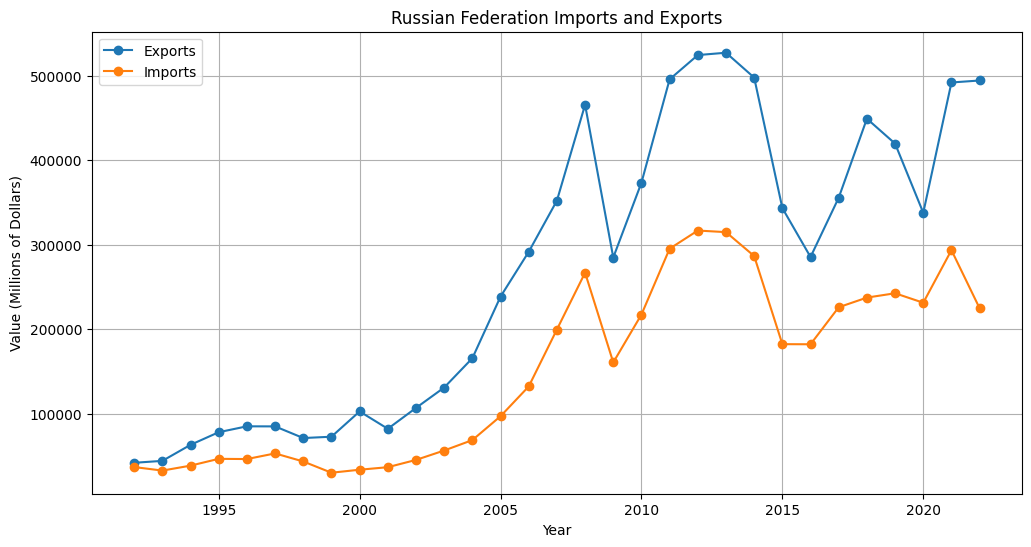

In [11]:
country = "Russian Federation"
#Russia: Russian Federation
#S Korea: Korea, Republic of
#N Korea: Korea, D P Rp

trade_types = ["X", "M"]  # X for exports, M for imports
filtered_df = dft[dft['country_english_name'] == country]
plt.figure(figsize=(12, 6))

for i, trade_type in enumerate(trade_types):
    sub_df = filtered_df[filtered_df['trade_flow'] == trade_type]
    grouped_df = sub_df.groupby('year')['value'].sum()
    plt.plot(grouped_df, marker='o', label="Imports" if trade_type == 'M' else "Exports")

plt.title(f'{country} Imports and Exports')
plt.xlabel('Year')
plt.ylabel('Value (Millions of Dollars)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
dft2 = dft.pivot_table(index=['country_english_name', 'year'], columns='trade_flow_desc', values='value', aggfunc='sum').reset_index()

# Calculate the difference between exports and imports
dft2['Exports-Imports'] = dft2['Exports'] - dft2['Imports']

# Stack the DataFrame to add 'Imports', 'Exports', and 'Exports-Imports' as separate rows
dft2 = dft2.melt(id_vars=['country_english_name', 'year'], value_vars=['Imports', 'Exports', 'Exports-Imports'], var_name='trade_flow_desc', value_name='value')

# Sort the DataFrame
dft2 = dft2.sort_values(by=['country_english_name', 'year', 'trade_flow_desc']).reset_index(drop=True)

dft2

country_english_name  year  trade_flow_desc        value
0              Afghanistan  1946          Exports    47.820000
1              Afghanistan  1946  Exports-Imports    -2.180000
2              Afghanistan  1946          Imports    50.000000
3              Afghanistan  1947          Exports    49.700000
4              Afghanistan  1947  Exports-Imports    -3.100000
...                    ...   ...              ...          ...
44539             Zimbabwe  2021  Exports-Imports -1957.497049
44540             Zimbabwe  2021          Imports  7993.684354
44541             Zimbabwe  2022          Exports  6585.479341
44542             Zimbabwe  2022  Exports-Imports -2603.022540
44543             Zimbabwe  2022          Imports  9188.501881

[44544 rows x 4 columns]

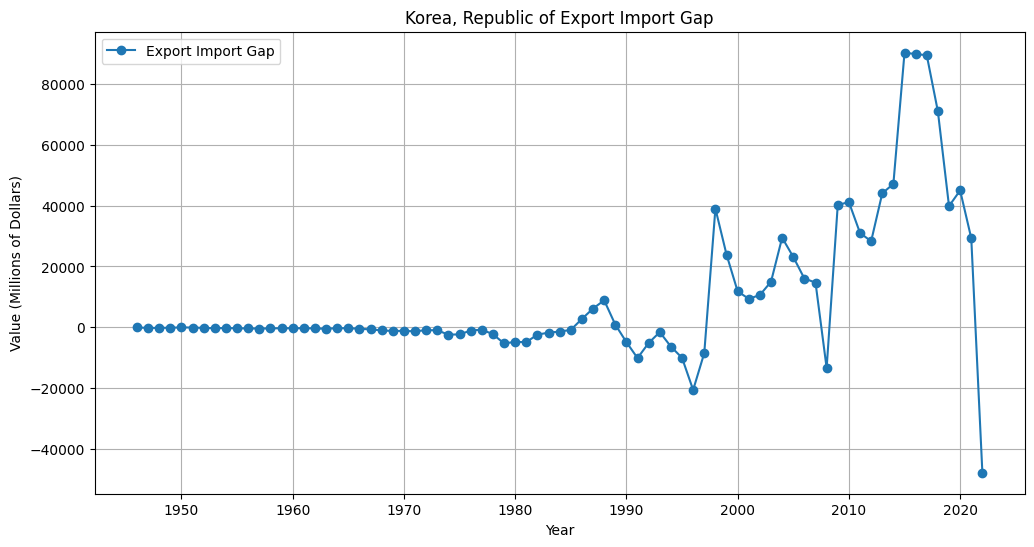

In [10]:
country = "Korea, Republic of"

filtered_df = dft2[dft2['country_english_name'] == country]
plt.figure(figsize=(12, 6))

sub_df = filtered_df[filtered_df['trade_flow_desc'] == 'Exports-Imports']
grouped_df = sub_df.groupby('year')['value'].sum()

plt.plot(grouped_df, marker='o', label="Export Import Gap")
#plt.plot(grouped_df.index, grouped_df.values, marker='o', color=['red' if value < 0 else 'green' for value in grouped_df.values], label="Export Import Gap")


plt.title(f'{country} Export Import Gap')
plt.xlabel('Year')
plt.ylabel('Value (Millions of Dollars)')
plt.grid(True)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


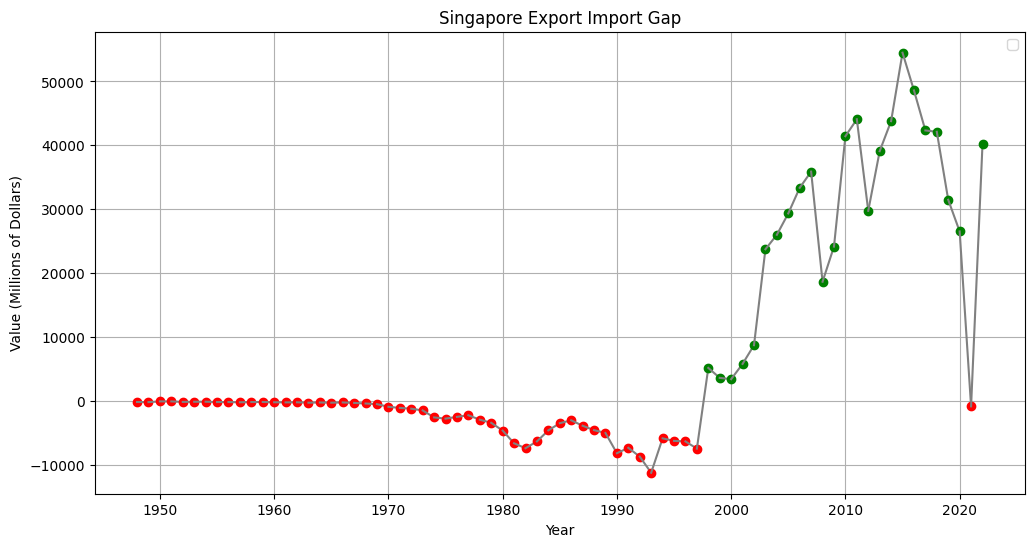

In [13]:
country = "Singapore"

filtered_df = dft2[dft2['country_english_name'] == country]
plt.figure(figsize=(12, 6))

sub_df = filtered_df[filtered_df['trade_flow_desc'] == 'Exports-Imports']
grouped_df = sub_df.groupby('year')['value'].sum()

for i in range(len(grouped_df.index) - 1):
    color = 'red' if grouped_df.values[i] < 0 else 'green'
    plt.plot(grouped_df.index[i], grouped_df.values[i], marker='o', color=color)
    plt.plot([grouped_df.index[i], grouped_df.index[i + 1]], [grouped_df.values[i], grouped_df.values[i + 1]], color='gray')

# Plot the last point separately to avoid connecting it with the next nonexistent point
color = 'red' if grouped_df.values[-1] < 0 else 'green'
plt.plot(grouped_df.index[-1], grouped_df.values[-1], marker='o', color=color)

plt.title(f'{country} Export Import Gap')
plt.xlabel('Year')
plt.ylabel('Value (Millions of Dollars)')
plt.grid(True)
plt.legend()
plt.show()


# GDP Per Capita

In [11]:
dfg = pd.read_excel('Data\GDP_cap_data.xlsx', sheet_name = "Full data") #trade data

In [12]:
dfg["country"].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia (Plurinational State of)', 'Brazil', 'Barbados',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'D.R. of the Congo',
       'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Czechoslovakia', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'China, Hong Kong SAR', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 

In [25]:
dfg

countrycode      country  year      gdppc          pop
0             AFG  Afghanistan  1820        NaN   3280.00000
1             AFG  Afghanistan  1870        NaN   4207.00000
2             AFG  Afghanistan  1913        NaN   5730.00000
3             AFG  Afghanistan  1950  1156.0000   8150.00000
4             AFG  Afghanistan  1951  1170.0000   8284.00000
...           ...          ...   ...        ...          ...
21677         ZWE     Zimbabwe  2014  1594.0000  13313.99205
21678         ZWE     Zimbabwe  2015  1560.0000  13479.13812
21679         ZWE     Zimbabwe  2016  1534.0000  13664.79457
21680         ZWE     Zimbabwe  2017  1582.3662  13870.26413
21681         ZWE     Zimbabwe  2018  1611.4052  14096.61179

[21682 rows x 5 columns]

In [16]:
dfg['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia (Plurinational State of)', 'Brazil', 'Barbados',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'D.R. of the Congo',
       'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Czechoslovakia', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'China, Hong Kong SAR', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


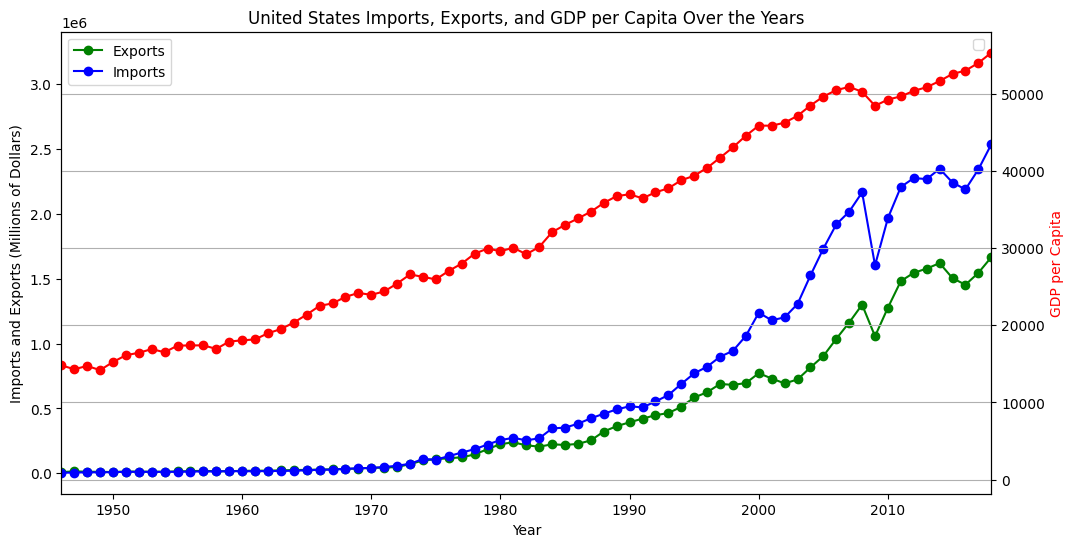

In [13]:
country = "United States"

trade_types = ["X", "M"]  # X for exports, M for imports
filtered_df = dft[dft['country_english_name'] == "United States"] # CHANGE THIS LINE IF THE NAMES DONT MATCH UP

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot imports and exports on the first axis
for i, trade_type in enumerate(trade_types):
    sub_df = filtered_df[filtered_df['trade_flow'] == trade_type]
    grouped_df = sub_df.groupby('year')['value'].sum()
    ax1.plot(grouped_df, marker='o', label="Imports" if trade_type == 'M' else "Exports", color='blue' if trade_type == 'M' else 'green')

# Set labels for the first y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Imports and Exports (Millions of Dollars)', color='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

new_data = dfg[dfg['country'] == country]
ax2.plot(new_data['year'], new_data['gdppc'], marker='o', linestyle='-', color='red')
ax2.set_ylabel('GDP per Capita', color='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title(f'{country} Imports, Exports, and GDP per Capita Over the Years')

# Show plot
plt.grid(True)

min_year = max(filtered_df['year'].min(), dfg[dfg['country'] == country]['year'].min())
max_year = min(filtered_df['year'].max(), dfg[dfg['country'] == country]['year'].max())

# Set the common range for both axes
ax1.set_xlim(min_year, max_year)
ax2.set_xlim(min_year, max_year)

plt.show()

# Country Health

In [21]:
dfh = pd.read_excel('Data\Data_1_country_health.xlsx', sheet_name = "Data") #trade data
dfh.dropna()
dfh.drop(columns=['Country Code', 'Series Code'], inplace=True)
dfh = dfh.dropna(subset=['Country Name'])
dfh = dfh[dfh['Country Name'] != "Data from database: Population estimates and projections"]
dfh = dfh[dfh['Country Name'] != "Last Updated: 12/20/2023"]

for column_name in dfh.columns:
    dfh[column_name] = dfh[column_name].replace('..', pd.NA)

In [22]:
columns = dfh.columns

# Define a function to extract only the year from the column name
def extract_year(column_name):
    return column_name.split()[0]

# Rename the columns
new_columns = [extract_year(col) if '[' in col else col for col in columns]
dfh.columns = new_columns
dfh

Country Name                                   Series Name       1960  \
0     Afghanistan          Death rate, crude (per 1,000 people)     31.921   
1     Afghanistan       Life expectancy at birth, total (years)     32.535   
2     Afghanistan                                 Net migration       2606   
3     Afghanistan  Population ages 0-14 (% of total population)  41.627186   
4     Afghanistan          Birth rate, crude (per 1,000 people)      50.34   
...           ...                                           ...        ...   
2123     Zimbabwe  Population ages 0-14 (% of total population)  47.315655   
2124     Zimbabwe          Birth rate, crude (per 1,000 people)      47.26   
2125     Zimbabwe                  Population growth (annual %)       <NA>   
2126     Zimbabwe                              Rural population    3326410   
2127     Zimbabwe                              Urban population     479900   

           1961       1962       1963       1964       1965       1966  \
0        31.349     30.845     30.359     29.867     29.389     28.872   
1        33.068     33.547     34.016     34.494     34.953     35.453   
2          6109       7016       6681       7079      10695       3563   
3     41.695303  41.769167  41.885377  42.059389  42.314133  42.620141   
4        50.443      50.57     50.703     50.831     50.872     50.986   
...         ...        ...        ...        ...        ...        ...   
2123  47.663873  48.052887  48.509669  48.733595  48.674055   48.60495   
2124     47.039     46.867     46.611     46.398     46.246     46.058   
2125   3.094865    3.10532   3.115408   3.119878   3.124829   3.129628   
2126    3422606    3519986    3610652    3702920    3796976    3892679   
2127     503346     529792     567279     607412     650173     695850   

           1967  ...       2011       2012       2013       2014       2015  \
0        28.396  ...      7.931      7.711      7.478      7.395      7.331   
1        35.924  ...     61.419     61.923     62.417     62.545     62.659   
2          6824  ...     418796     105905      48076     255611    -281739   
3     42.918797  ...   48.26436   47.43249  46.867621  46.231538  45.792106   
4        51.081  ...     39.855     40.009     39.601     39.105     38.803   
...         ...  ...        ...        ...        ...        ...        ...   
2123  48.550049  ...  43.383758  43.453948   43.37044  43.172363  42.872671   
2124     45.949  ...     37.205     36.804     36.246     35.122      33.96   
2125   3.135761  ...   1.438339   1.822309   2.163267   2.191391   2.136294   
2126    3990069  ...    8725322    8909792    9129035    9352079    9570861   
2127     744625  ...    4300463    4355539    4426387    4503674    4584076   

           2016       2017       2018       2019       2020  
0         7.077      7.027      6.981      6.791      7.113  
1        63.136     63.016     63.081     63.565     62.575  
2        -90238     -47090     -47205      -8082     166821  
3     45.520967  45.118616  44.708445  44.291352  43.807912  
4        37.936     37.342     36.927     36.466     36.051  
...         ...        ...        ...        ...        ...  
2123  42.517883  42.152298  41.798795  41.468973  41.156085  
2124     33.171     32.516     32.074     31.518     31.009  
2125   2.081806    2.04362   2.020537   1.989253   2.031112  
2126    9785059    9995789   10204026   10408889   10617452  
2127    4667645    4755312    4848158    4945719    5052214  

[2128 rows x 63 columns]

In [23]:
dfh["Country Name"].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Repub

In [24]:
dfh['Series Name'].unique()

array(['Death rate, crude (per 1,000 people)',
       'Life expectancy at birth, total (years)', 'Net migration',
       'Population ages 0-14 (% of total population)',
       'Birth rate, crude (per 1,000 people)',
       'Population growth (annual %)', 'Rural population',
       'Urban population'], dtype=object)

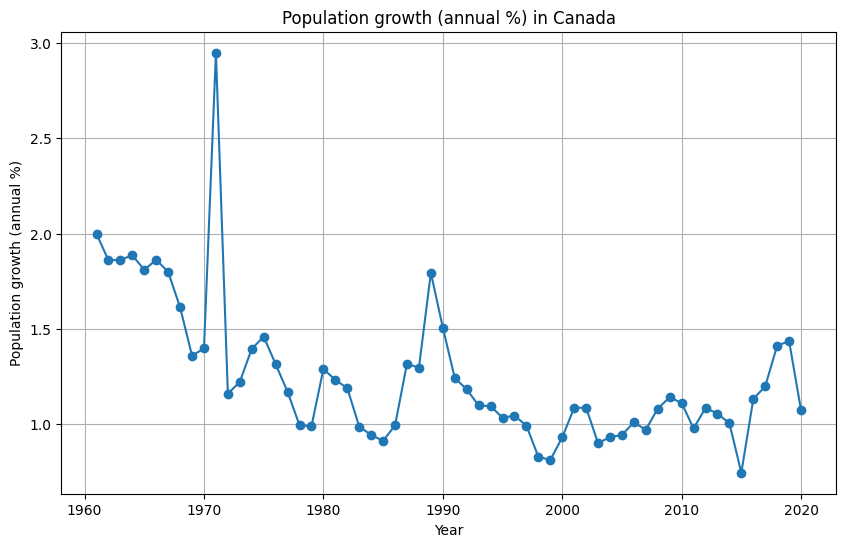

In [25]:
country_name = "Canada"
variable_name = "P"


variable_names = {'D': 'Death rate, crude (per 1,000 people)', 
                  'L': 'Life expectancy at birth, total (years)', 
                  'Y': r'Population ages 0-14 (% of total population)', 
                  'B': 'Birth rate, crude (per 1,000 people)',
                  'P': 'Population growth (annual %)', 
                  'R': 'Rural population', 
                  'U': "Urban population"}

variable_name = variable_names[variable_name]

country_data = dfh[dfh['Country Name'] == country_name]
variable_data = country_data[country_data['Series Name'] == variable_name]


years = variable_data.columns[2:].astype(int)  # Assuming years are the column names starting from the 3rd column
values = variable_data.iloc[:, 2:].values[0]


for i in range(len(values)):
    try:
        if values[i] is pd.NA:
            values = np.delete(values, i)
            years = np.delete(years, i)
    except:
        pass


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-')
plt.title(f"{variable_name} in {country_name}")
plt.xlabel("Year")
plt.ylabel(variable_name)
plt.grid(True)
plt.show()

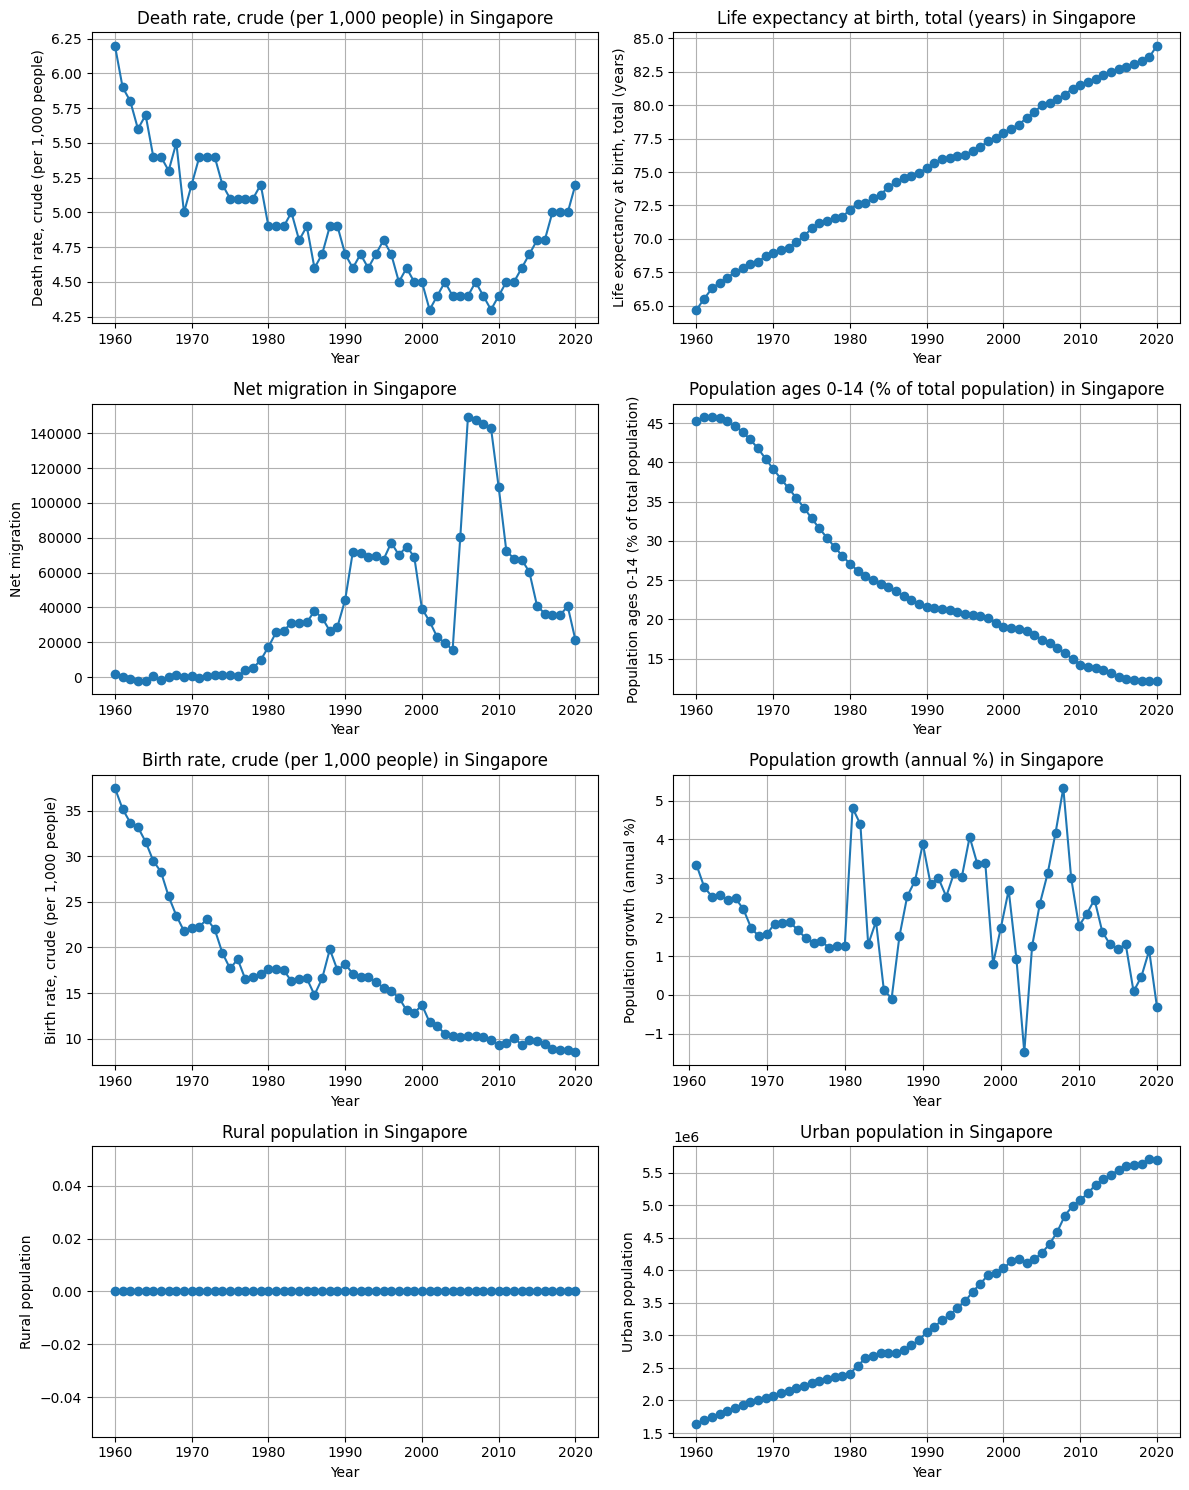

In [27]:
country_name = "Singapore"


variable_names = ['Death rate, crude (per 1,000 people)',
       'Life expectancy at birth, total (years)', 'Net migration',
       r'Population ages 0-14 (% of total population)',
       'Birth rate, crude (per 1,000 people)',
       'Population growth (annual %)', 
       'Rural population',
       'Urban population']

fig, axs = plt.subplots(4, 2, figsize=(12, 15))
axs = axs.flatten()

for i in range(len(variable_names)):

    variable_name = variable_names[i]

    country_data = dfh[dfh['Country Name'] == country_name]
    variable_data = country_data[country_data['Series Name'] == variable_name]

    years = variable_data.columns[2:].astype(int)  # Assuming years are the column names starting from the 3rd column
    values = variable_data.iloc[:, 2:].values[0]

    for j in range(len(values)):
        try:
            if values[j] is pd.NA:
                values = np.delete(values, j)
                years = np.delete(years, j)
        except:
            pass

    axs[i].plot(years, values, marker='o', linestyle='-')  # Assuming y contains data for each subplot
    axs[i].set_title(f"{variable_name} in {country_name}")  # Set title for each subplot
    axs[i].set_xlabel("Year")  # Set xlabel for each subplot
    axs[i].set_ylabel(variable_name)  # Set ylabel for each subplot
    axs[i].grid(True)  # Enable grid for each subplot

plt.tight_layout()
plt.show()

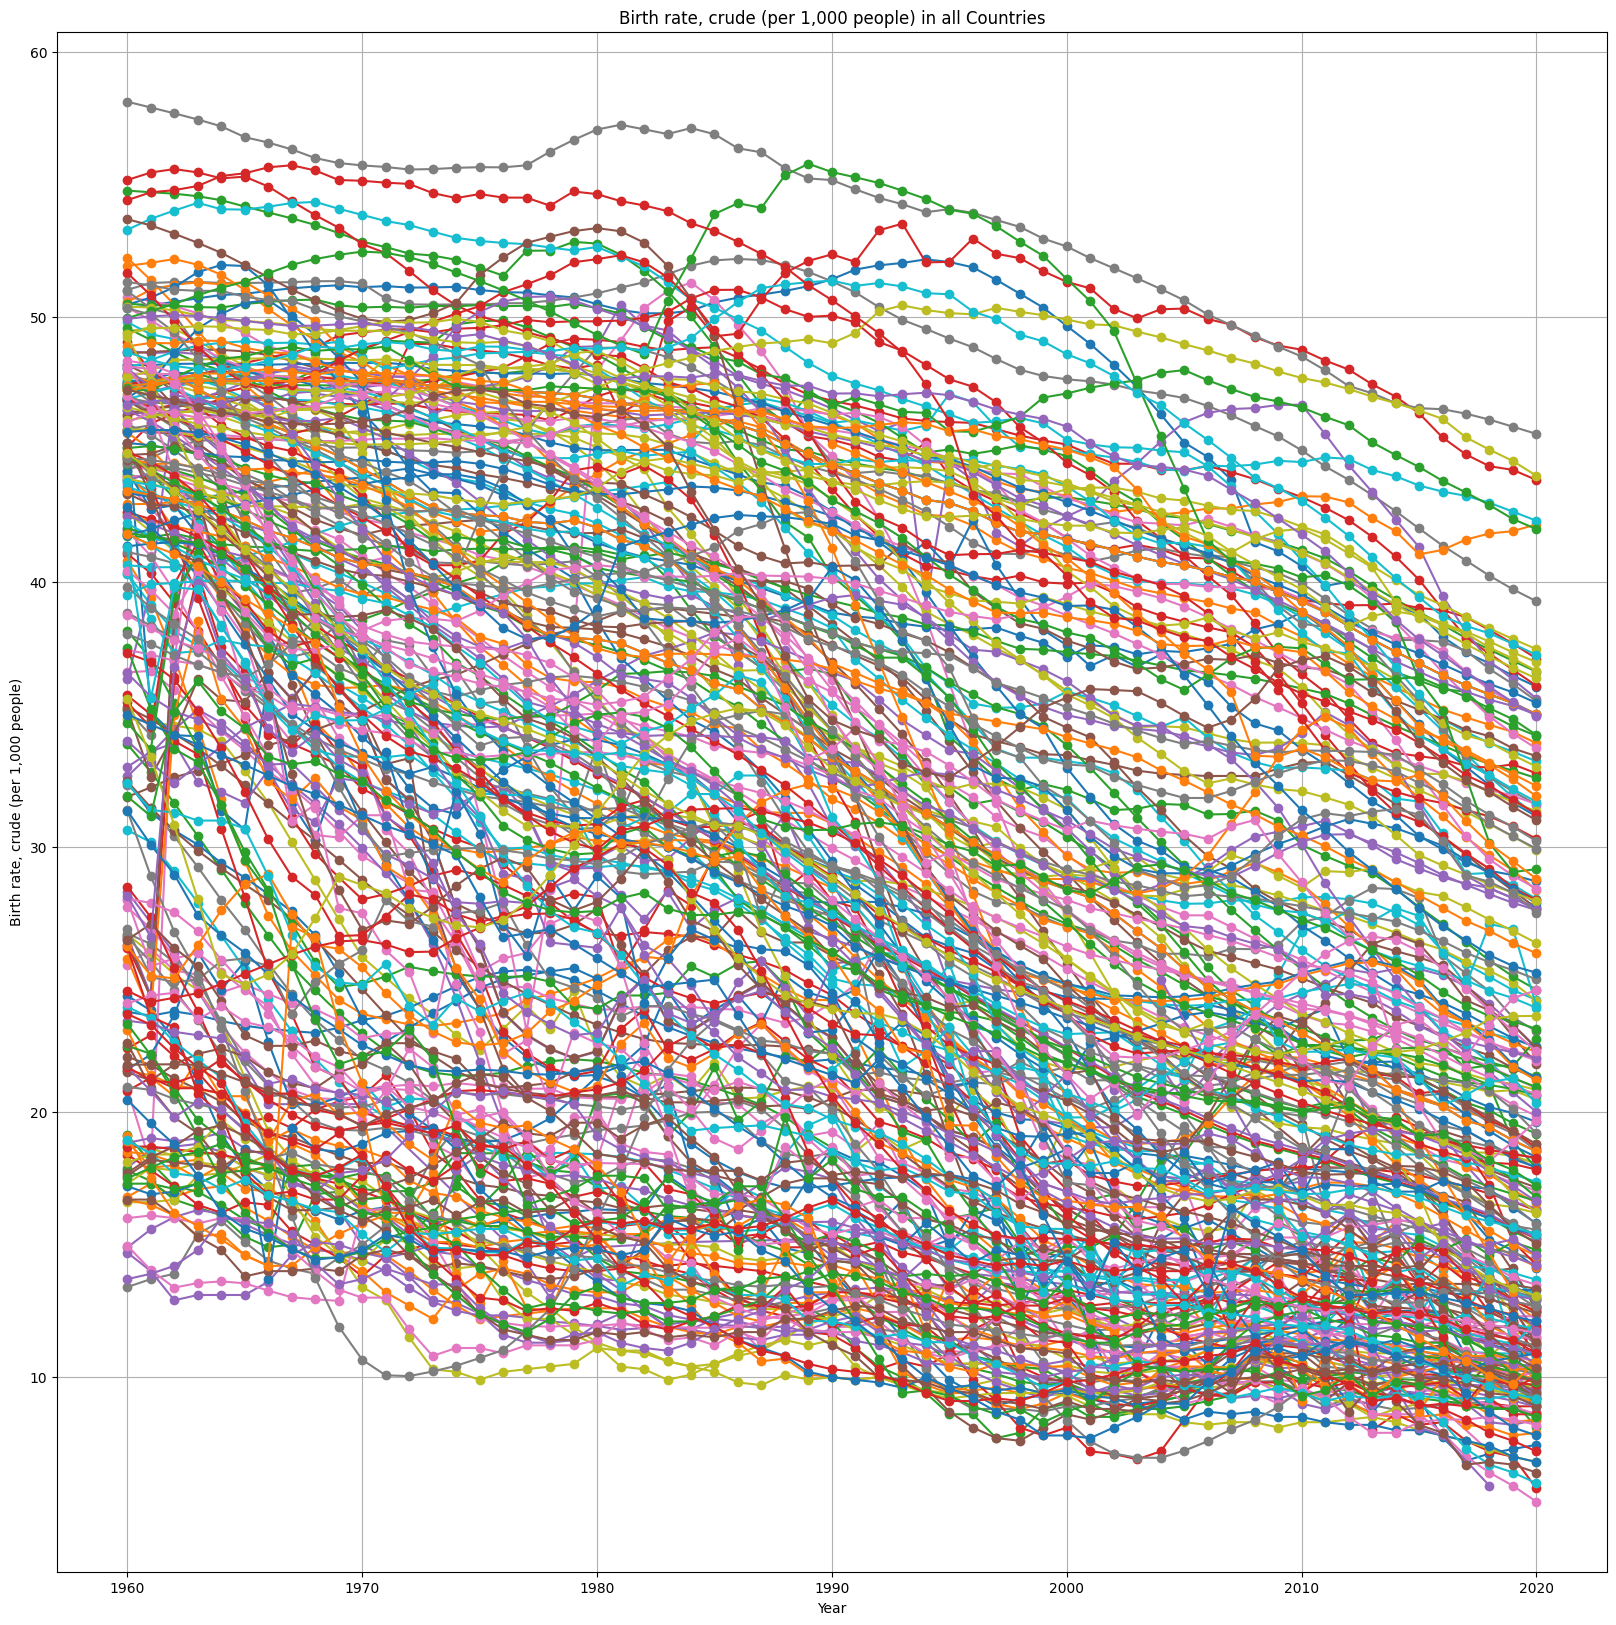

In [33]:
variable_name = "B"
countries = dfh["Country Name"].unique()

variable_names = {'D': 'Death rate, crude (per 1,000 people)', 
                  'L': 'Life expectancy at birth, total (years)', 
                  'Y': r'Population ages 0-14 (% of total population)', 
                  'B': 'Birth rate, crude (per 1,000 people)',
                  'P': 'Population growth (annual %)', 
                  'R': 'Rural population', 
                  'U': "Urban population"}

variable_name = variable_names[variable_name]
plt.figure(figsize=(20, 20))
for country in countries:
    country_data = dfh[dfh["Country Name"] == country]
    variable_data = country_data[country_data['Series Name'] == variable_name]

    years = variable_data.columns[2:].astype(int)  # Assuming years are the column names starting from the 3rd column
    values = variable_data.iloc[:, 2:].values[0]

    indexes = []
    for j in range(len(values)):
        if values[j] is not pd.NA:
            indexes.append(j)

    years_clean = []
    values_clean = []
    for m in range(len(indexes)):
        values_clean.append(values[indexes[m]])
        years_clean.append(years[indexes[m]])

    #values_clean = values[values != pd.NA]
    #years_clean = years[values != pd.NA]

    # Plot the data
    plt.plot(years_clean, values_clean, marker='o', linestyle='-')
plt.title(f"{variable_name} in all Countries")

plt.xlabel("Year")
plt.ylabel(variable_name)
plt.grid(True)
plt.show()


# GDP Data

In [28]:
dfgdp = pd.read_excel('Data\GDP Data.xlsx', sheet_name = "Data") 
dfgdp.dropna()
dfgdp = dfgdp[dfgdp['Series Name'] != "Data from database: World Development Indicators"]
dfgdp = dfgdp[dfgdp['Series Name'] != "Last Updated: 02/21/2024"]
dfgdp = dfgdp.dropna(subset=['Series Name'])
dfgdp.drop(columns=['Series Code', 'Country Code'], inplace=True)
for column_name in dfgdp.columns:
    dfgdp[column_name] = dfgdp[column_name].replace('..', pd.NA)

columns = dfgdp.columns
def extract_year(column_name):
    return column_name.split()[0]
new_columns = [extract_year(col) if '[' in col else col for col in columns]
dfgdp.columns = new_columns


In [29]:
dfgdp.columns

Index(['Series Name', 'Country Name', '1960', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [30]:
dfgdp["Series Name"].unique()

array(['GDP per capita (current US$)',
       'Adjusted net national income per capita (constant 2015 US$)',
       'Adjusted net national income (annual % growth)',
       'Adjusted net national income (current US$)',
       'Central government debt, total (% of GDP)',
       'Cause of death, by injury (% of total)', 'CO2 emissions (kt)',
       'Consumer price index (2010 = 100)', 'GDP (constant 2015 US$)',
       'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (constant LCU)',
       'GDP per capita, PPP (constant 2017 international $)',
       'GDP, PPP (current international $)',
       'GDP per person employed (constant 2017 PPP $)',
       'GNI (constant 2015 US$)', 'GNI (current LCU)',
       'GNI growth (annual %)', 'GNI per capita (constant LCU)',
       'Gross capital formation (% of GDP)', 'Labor force, total',
       'Population growth (annual %)'], dtype=object)

In [31]:
dfgdp["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands',

IndexError: index 0 is out of bounds for axis 0 with size 0

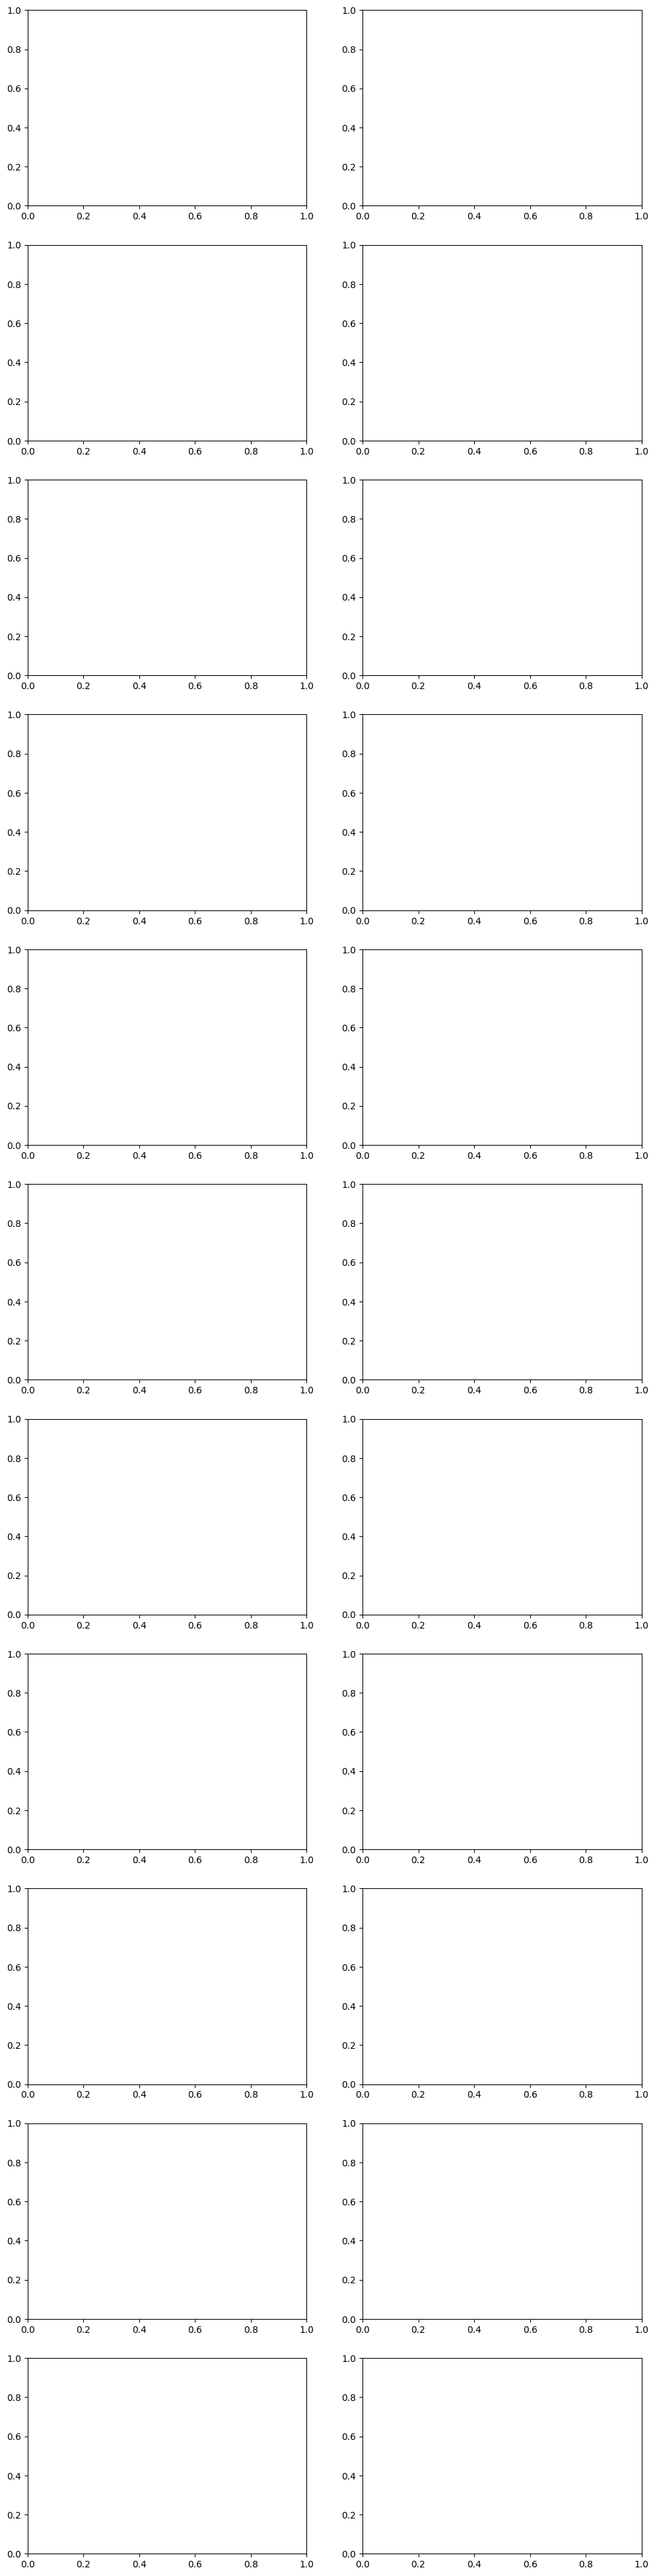

In [32]:
country_name = "Korea, Rep"


variable_names = ['GDP per capita (current US$)',
       'Adjusted net national income per capita (constant 2015 US$)',
       r'Adjusted net national income (annual % growth)',
       'Adjusted net national income (current US$)',
       r'Central government debt, total (% of GDP)',
       r'Cause of death, by injury (% of total)', 'CO2 emissions (kt)',
       'Consumer price index (2010 = 100)', 'GDP (constant 2015 US$)',
       'GDP (current LCU)', 'GDP growth (annual %)',
       'GDP per capita (constant LCU)',
       'GDP per capita, PPP (constant 2017 international $)',
       'GDP, PPP (current international $)',
       'GDP per person employed (constant 2017 PPP $)',
       'GNI (constant 2015 US$)', 'GNI (current LCU)',
       'GNI growth (annual %)', 'GNI per capita (constant LCU)',
       r'Gross capital formation (% of GDP)', 'Labor force, total',
       'Population growth (annual %)']

fig, axs = plt.subplots(11, 2, figsize=(12, 50))
axs = axs.flatten()

for i in range(len(variable_names)):

    variable_name = variable_names[i]

    country_data = dfgdp[dfgdp['Country Name'] == country_name]
    variable_data = country_data[country_data['Series Name'] == variable_name]

    years = variable_data.columns[2:].astype(int)  # Assuming years are the column names starting from the 3rd column
    values = variable_data.iloc[:, 2:].values[0]

    indexes = []
    for j in range(len(values)):
        if values[j] is not pd.NA:
            indexes.append(j)

    years_clean = []
    values_clean = []
    for m in range(len(indexes)):
        values_clean.append(values[indexes[m]])
        years_clean.append(years[indexes[m]])

    axs[i].plot(years_clean, values_clean, marker='o', linestyle='-')  # Assuming y contains data for each subplot
    axs[i].set_title(f"{variable_name} in {country_name}")  # Set title for each subplot
    axs[i].set_xlabel("Year")  # Set xlabel for each subplot
    axs[i].set_ylabel(variable_name)  # Set ylabel for each subplot
    axs[i].grid(True)  # Enable grid for each subplot

plt.tight_layout()
plt.show()